In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
df=pd.read_csv('calendar.csv')

In [3]:
df.shape

(1393570, 4)

In [4]:
df.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [5]:
df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [6]:
df.available.value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
dic={'t':1, 'f':0}
df['available']=df['available'].map(dic)

In [10]:
lis1=df.groupby(['listing_id'])['available'].sum().median()

lis1

308.0

In [11]:
df.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,$85.00
1,241032,2016-01-05,1,$85.00
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [12]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day


In [13]:
def numeric_converter(df):
    
        df=df.str.strip('% $ ,')
        df=df.str.replace(',', '')
        df=pd.to_numeric(df,downcast='float')
        return df

In [14]:
month=range(1,13,1)
def target(par1):
    y=[]
    for i in range(1,13,1):
           y.append(df[df['date'].dt.month==i][par1].mean())    
    
    return y
df['price']=numeric_converter(df['price'])

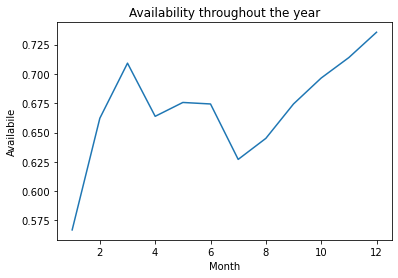

In [16]:

plt.plot(month,target('available'))

plt.xlabel('Month')
plt.ylabel('Availabile')
plt.title('Availability throughout the year')
plt.show()

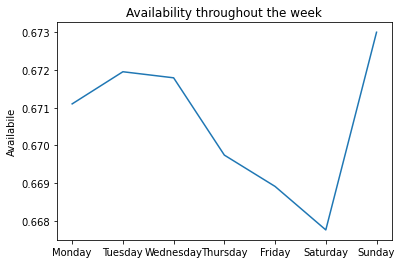

In [18]:
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
def target(par1):
    y=[]
    for i in range(0,7,1):
           y.append(df[df['date'].dt.dayofweek==i][par1].mean())    
    
    return y
plt.plot(week,target('available'))
#plt.xlabel('Week')
plt.ylabel('Availabile')
plt.title('Availability throughout the week')
plt.show()